In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin = dataset_url,cache_dir='.',untar=True)

In [3]:
import pathlib
data_dir=pathlib.Path(data_dir)

In [4]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/326541992_d542103ca8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16772483324_09f24813a1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16903172207_2cd7aca66a.jpg'),
 PosixPath('datasets/flower_photos/roses/12572786553_634868f7f2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/20622485918_90fc000c86_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5180896559_b8cfefc21e.jpg'),
 PosixPath('datasets/flower_photos/roses/527513005_41497ca4dc.jpg'),
 PosixPath('datasets/flower_photos/roses/9164924345_6b63637acf.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3997609936_8db20b7141_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9338237628_4d2547608c.jpg'),
 PosixPath('datasets/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 Po

In [5]:
flowers_images_dict = {
'roses' : list(data_dir.glob('roses/*')),
'daisy' : list(data_dir.glob('daisy/*')),
'dandelion' : list(data_dir.glob('dandelion/*')),
'sunflowers' : list(data_dir.glob('sunflowers/*')),
'tulips' : list(data_dir.glob('tulips/*')),
}


In [8]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [10]:
X,y =[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [11]:
X = np.array(X)
y=np.array(y)

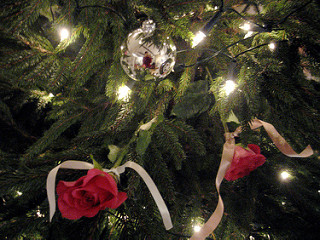

In [15]:
from google.colab.patches import cv2_imshow
img = cv2.imread(str(flowers_images_dict['roses'][0]))
cv2_imshow(img)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)#default splitting 0.25

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
num_classes = 5
model =Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs = 10)

Epoch 1/10
86/86 [==============================] - 86s 986ms/step - loss: 1.2603 - accuracy: 0.4757
Epoch 2/10
86/86 [==============================] - 83s 969ms/step - loss: 1.0000 - accuracy: 0.6101
Epoch 3/10
86/86 [==============================] - 82s 952ms/step - loss: 0.8003 - accuracy: 0.6973
Epoch 4/10
86/86 [==============================] - 81s 947ms/step - loss: 0.5964 - accuracy: 0.7871
Epoch 5/10
86/86 [==============================] - 81s 945ms/step - loss: 0.3849 - accuracy: 0.8637
Epoch 6/10
86/86 [==============================] - 82s 950ms/step - loss: 0.2126 - accuracy: 0.9371
Epoch 7/10
86/86 [==============================] - 83s 963ms/step - loss: 0.1034 - accuracy: 0.9709
Epoch 8/10
86/86 [==============================] - 84s 972ms/step - loss: 0.0655 - accuracy: 0.9836
Epoch 9/10
86/86 [==============================] - 85s 988ms/step - loss: 0.0674 - accuracy: 0.9793
Epoch 10/10
86/86 [==============================] - 83s 971ms/step - loss: 0.0361 - accura

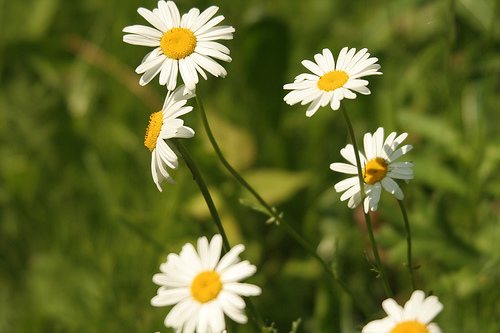

In [30]:
from google.colab.patches import cv2_imshow
img = cv2.imread(str(flowers_images_dict['daisy'][16]))
cv2_imshow(img)

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 304ms/step - loss: 1.9296 - accuracy: 0.6373


[1.9296289682388306, 0.6372548937797546]

In [32]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 8s 268ms/step


array([[  0.7216318 ,   8.200648  ,   1.2099377 ,  -3.3108716 ,
         -0.42418447],
       [  7.541123  ,  -4.2472324 , -13.815033  ,  -4.8360443 ,
         15.192961  ],
       [  2.503447  ,   1.0247557 ,  14.1053    , -13.361537  ,
         -4.3442826 ],
       ...,
       [ -6.112326  , -11.979248  ,   6.7361546 ,  13.665136  ,
          1.37575   ],
       [  3.7242777 ,   2.459732  ,   5.4213614 ,  -5.8316    ,
         -5.4897027 ],
       [ -6.928676  , -10.178278  ,   2.799867  ,  18.971388  ,
         -7.1536374 ]], dtype=float32)

In [33]:
score = tf.nn.softmax(predictions[0])

In [35]:
np.argmax(score)

1

In [43]:
y_test[3]

4

In [45]:
data_augementation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),

    ]
)

In [46]:
model =Sequential([
    data_augementation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs = 10)

Epoch 1/10
86/86 [==============================] - 104s 1s/step - loss: 1.3776 - accuracy: 0.4164
Epoch 2/10
86/86 [==============================] - 96s 1s/step - loss: 1.0685 - accuracy: 0.5683
Epoch 3/10
86/86 [==============================] - 97s 1s/step - loss: 0.9784 - accuracy: 0.6225
Epoch 4/10
86/86 [==============================] - 97s 1s/step - loss: 0.8896 - accuracy: 0.6602
Epoch 5/10
86/86 [==============================] - 97s 1s/step - loss: 0.8179 - accuracy: 0.6908
Epoch 6/10
86/86 [==============================] - 96s 1s/step - loss: 0.8027 - accuracy: 0.6951
Epoch 7/10
86/86 [==============================] - 103s 1s/step - loss: 0.7328 - accuracy: 0.7140
Epoch 8/10
86/86 [==============================] - 98s 1s/step - loss: 0.7094 - accuracy: 0.7217
Epoch 9/10
86/86 [==============================] - 98s 1s/step - loss: 0.6388 - accuracy: 0.7547
Epoch 10/10
86/86 [==============================] - 98s 1s/step - loss: 0.6036 - accuracy: 0.7667


In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 304ms/step - loss: 0.8213 - accuracy: 0.6917


[0.821286678314209, 0.6917211413383484]